In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import nltk 
import string
import re
from sklearn.feature_extraction import text
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
Music = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - Music.xlsx')
Entertainment = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - Entertainment.xlsx')
Game = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - Game.xlsx')
Channel = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - Channel.xlsx')
media = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - media.xlsx')
Fun = pd.read_excel('/Users/poojapatel/Downloads/GoHundred - Fun.xlsx')

In [118]:
dataset = pd.concat([Entertainment,Game, Channel, Fun])
dataset.shape

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2174, 7)

In [101]:
print(Music.shape, Entertainment.shape, Game.shape, Channel.shape, media.shape, Fun.shape)

(1513, 7) (189, 5) (1828, 5) (80, 5) (155, 5) (77, 7)


# MUSIC

In [103]:
all_stopwords = stopwords.words('english')
all_stopwords.append('music')
# all_stopwords.append('Entertainment')
# all_stopwords.append('covid19')
# all_stopwords.append('game')
# all_stopwords.append('media')
# all_stopwords.append('covid')
# all_stopwords.append('coronavirus')
# all_stopwords.append('games')
all_stopwords.append('mobile')
all_stopwords.append('rt')

def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
#     text = text.apply(lambda x: ' '.join([word for word in x if(len(word)>2)]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

# Applying noise removal function to data
Music['Filtered_Review_Text'] = remove_noise(Music['title'])

def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
Music['Polarity'] = sentiment_analyser(Music['Filtered_Review_Text'])
Music.head(2)

,social_type,title,date,url,sentiment,Filtered_Review_Text,Polarity
0,facebook,جميعهم يطالبون بالحرية من اجل الحياة...الا انا...,2020-06-02,https://www.facebook.com/206762653265484/posts...,POSITIVE,johan,0.0
1,facebook,من كل قلبي، ومن كلّ عقلي، ولا شيء أغلى من هذا ...,2020-06-01,https://www.facebook.com/206762653265484/posts...,POSITIVE,,0.0


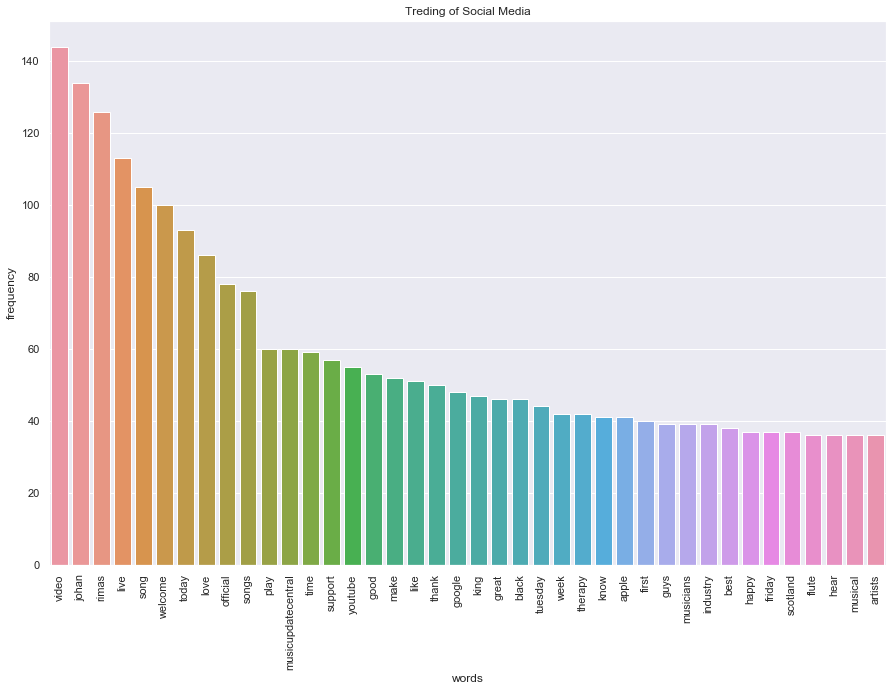

In [104]:
tweet_All = " ".join(review for review in Music.Filtered_Review_Text)
splitted_text = tweet_All.split()
specific_words = [word for word in splitted_text if(len(word)> 3)]

freq_tweets_hashtag = FreqDist(list((" ".join(specific_words)).split())).most_common(40)
freq_tweets_hashtag = pd.DataFrame(freq_tweets_hashtag, columns=['words', 'frequency'])


plt.figure(figsize= (15,10))
sns.barplot(x='words', y='frequency', data=freq_tweets_hashtag)
plt.xticks(rotation = 90)
plt.title('Treding of Social Media')
plt.show()

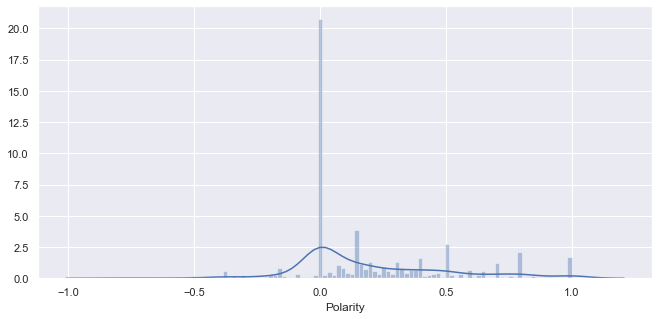

In [105]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(Music['Polarity'] ,hist=True, bins=100)

In [106]:
df_neutral = Music[Music['sentiment']=="NEUTRAL"]
df_positive = Music[Music['sentiment']=="POSITIVE"]
df_negative = Music[Music['sentiment']=="NEGATIVE"]

pos_words =[]
neg_words = []
neutral_words = []

for review in df_positive.Filtered_Review_Text:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:50000]

for review in df_negative.Filtered_Review_Text:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:100000]

for review in df_neutral.Filtered_Review_Text:
    neutral_words.append(review)
neutral_words = ' '.join(neutral_words)
neutral_words[:150000]

'johan rimas musique sailing joe dassin johan rimas  hello piano lover johan rimas  mermaid johan rimas  lara fabian johan rimas cristina spatar marbella johan rimas la bionda one one johan rimas country wildcats cats bad moon rising johan rimas ed sheeran perfect duet johan rimas johan rimas julio iglesias gozar la vida johan rimas johan rimas  play strings heart johan johan rimas julio iglesias hey johan rimas mean lot johan rimas whoa love johan rimas des roses ch rir johan rimas mambo italiano johan rimas ch rie johan rimas julio iglesias nostalgie johan rimas moulin rouge come may johan rimas el bolero de raquel johan rimas lady red chris de burgh johan rimas evadiendomejulio iglesias johan rimas  maria carey cant leave without magical tunes make languages impotent julio iglesiaspensami johan rimas londoner ben fenner pours rose social chain adopted city manchester bloom singersongwriter perth australia ellysse mason covering everything wanted billie eilish ollie walton keys james

Positive reviews

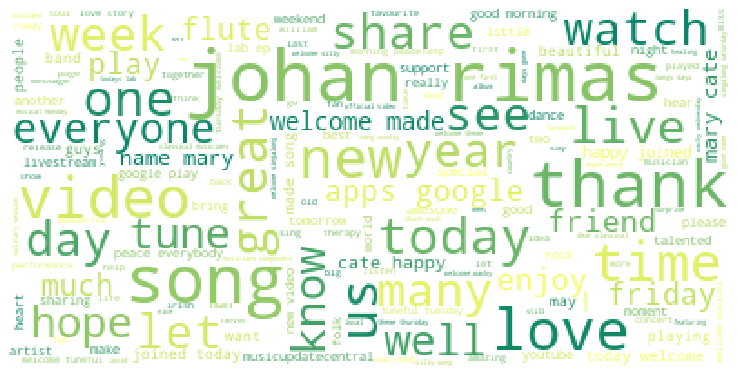

In [107]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Negative Tweets:

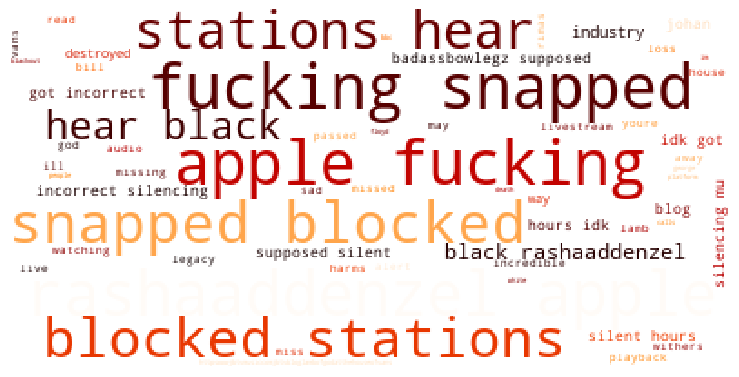

In [108]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Neutral Reviews

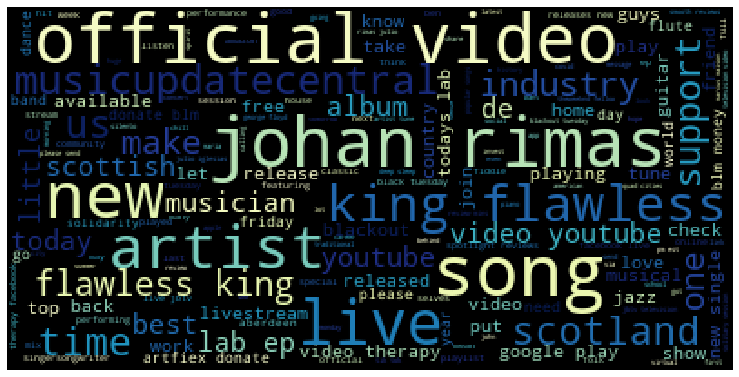

In [109]:
wordcloud = WordCloud().generate(neutral_words)

wordcloud = WordCloud(background_color="BLACK",max_words=len(neutral_words),\
                      max_font_size=40, relative_scaling=.5, colormap='YlGnBu').generate(neutral_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# GAME

In [119]:
all_stopwords = stopwords.words('english')
# all_stopwords.append('music')
all_stopwords.append('Entertainment')
all_stopwords.append('covid19')
all_stopwords.append('game')
all_stopwords.append('media')
all_stopwords.append('covid')
all_stopwords.append('coronavirus')
all_stopwords.append('games')
all_stopwords.append('mobile')
all_stopwords.append('rt')

def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
#     text = text.apply(lambda x: ' '.join([word for word in x if(len(word)>2)]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

# Applying noise removal function to data
dataset['Filtered_Review_Text'] = remove_noise(dataset['title'])

def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
dataset['Polarity'] = sentiment_analyser(dataset['Filtered_Review_Text'])
dataset.head(2)

,Filtered_Review_Text,Polarity,date,sentiment,social_type,title,url
0,naruto x boruto ninja tribes free play browser...,0.400000,2020-05-18,NEUTRAL,facebook,NARUTO X BORUTO Ninja Tribes is FREE to play o...,https://www.facebook.com/49054165628/posts/101...
1,watched several videos kind entertainment even...,0.124777,2019-12-30,POSITIVE,facebook,I’ve watched several of your videos and this k...,https://www.facebook.com/787144554960137/posts...


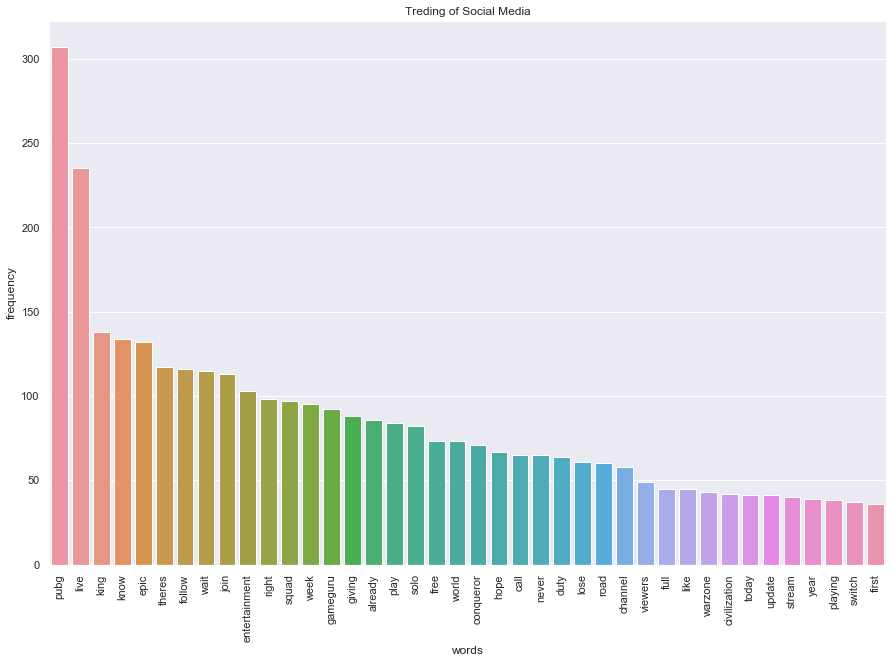

In [120]:
tweet_All = " ".join(review for review in dataset.Filtered_Review_Text)
splitted_text = tweet_All.split()
specific_words = [word for word in splitted_text if(len(word)> 3)]

freq_tweets_hashtag = FreqDist(list((" ".join(specific_words)).split())).most_common(40)
freq_tweets_hashtag = pd.DataFrame(freq_tweets_hashtag, columns=['words', 'frequency'])


plt.figure(figsize= (15,10))
sns.barplot(x='words', y='frequency', data=freq_tweets_hashtag)
plt.xticks(rotation = 90)
plt.title('Treding of Social Media')
plt.show()

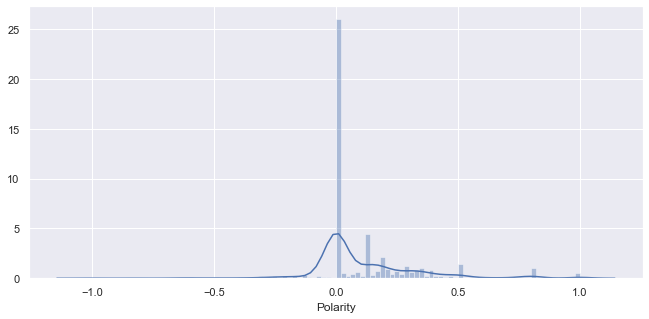

In [121]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(dataset['Polarity'] ,hist=True, bins=100)

In [122]:
df_neutral = dataset[dataset['sentiment']=="NEUTRAL"]
df_positive = dataset[dataset['sentiment']=="POSITIVE"]
df_negative = dataset[dataset['sentiment']=="NEGATIVE"]

pos_words =[]
neg_words = []
neutral_words = []

for review in df_positive.Filtered_Review_Text:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:50000]

for review in df_negative.Filtered_Review_Text:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:100000]

for review in df_neutral.Filtered_Review_Text:
    neutral_words.append(review)
neutral_words = ' '.join(neutral_words)
neutral_words[:150000]

'naruto x boruto ninja tribes free play browser httpsbandainamcoplayninjatribes entertainment lawyer shares ups downs egg freezing journey hopes inspiring women learn fertility options j small friday first full mixout blocbloc hq social distancing trivia music bingo karaoke parties booked every week block parties backyard parties starting become norm also virtual events well would like book event please call email douglasheadtiltentertainmentcom tonights tonight lineup want build snowman built fairmontgranddelmar riding rides kiddos ice skating snowman holidayentertainment decision announced government sunday night prevent people leaving homes nightly disinfection period pm heas da audio live lastnytenjoy brandijeter heres list entertainment brands believe blacklivesmatter httpstcoayocmvysx via shayewyllie beer_mood ifimatthew cnn news entertainment new one reading cnn newsentertainment wh httpstcobxgxtevxa pwkidsbookshelf childrens books teach kids racism discrimination essence httpst

# Positive Reviews

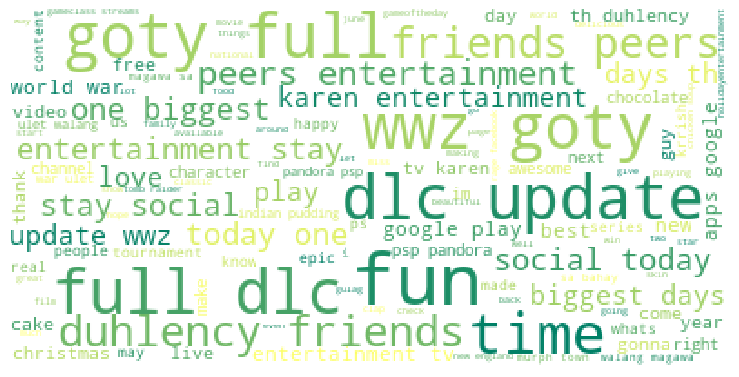

In [123]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Negative Reviews

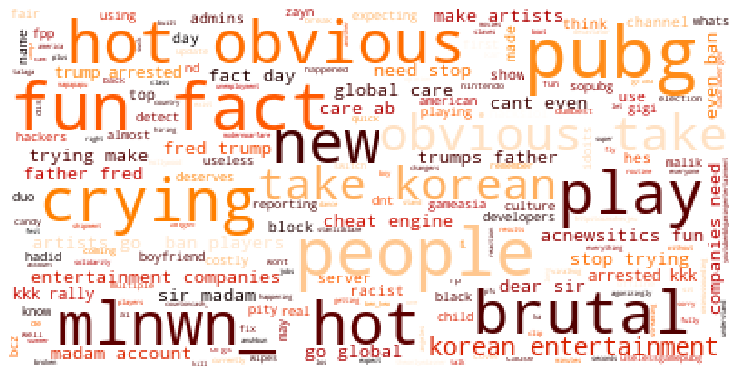

In [124]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Neutral Reviews

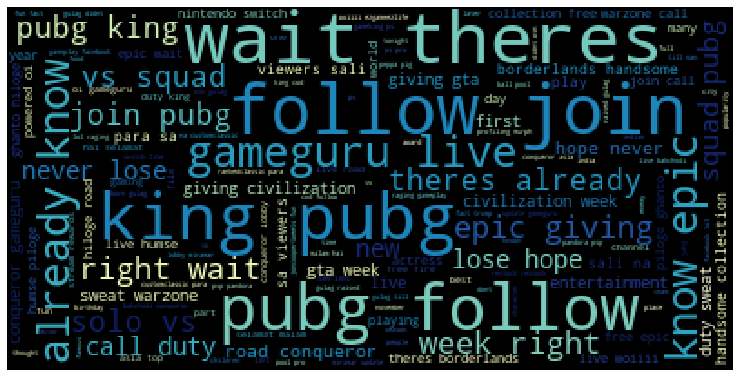

In [125]:
wordcloud = WordCloud().generate(neutral_words)

wordcloud = WordCloud(background_color="BLACK",max_words=len(neutral_words),\
                      max_font_size=40, relative_scaling=.5, colormap='YlGnBu').generate(neutral_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()